### APRENDIZAJE PROFUNDO PARA PROCESAMIENTO DE INFORMACIÓN BIOMÉTRICA

# PRÁCTICA 1
### GRUPO 
* Hajar Boulehdid
* Sofía Santos Schmick
* Andrés Teruel Fernández

---


In [1]:
import os
import random
import numpy as np

from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.model_selection import KFold, cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from hajar_face_recognition_main import *

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2025-02-15 00:53:01.728990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-15 00:53:02.122588: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-02-15 00:53:02.122672: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-02-15 00:53:02.1

In [2]:
# Paths and parameters:
data_directory = 'imagenes'
ddbb_directory = 'bbdd'

---

## TAREA 1.0:

 - Revisa y entiende el código
 - Compara con la imagen 2 o 3 con las anterires.

In [3]:
images = [os.path.join(data_directory, f"{i}.jpg") for i in range(4)]
images

['imagenes/0.jpg', 'imagenes/1.jpg', 'imagenes/2.jpg', 'imagenes/3.jpg']

In [4]:
""""Comparamos si son la misma persona a través de una simple.Detectamos las caras de las imagenes. Imagen0 y Imagen1"""

for i in range(len(images)):
    for j in range(i + 1, len(images)):
        image1 = images[i]
        image2 = images[j]
        
        compare_images(image1, image2, crop_image=True)

Las imágenes pertenecen a la misma persona con similitud 0.61
Las imágenes pertenecen a diferentes personas con similitud 0.33
Las imágenes pertenecen a diferentes personas con similitud 0.36
Las imágenes pertenecen a diferentes personas con similitud 0.38
Las imágenes pertenecen a diferentes personas con similitud 0.24
Las imágenes pertenecen a diferentes personas con similitud 0.21


---

## TAREA 1.1: 

 - Generate a small database with a minimum of 3 images per person and 10 persons.
 - Develop a script to calculate the FAR and FRR curves.   

 Creando la base de datos de embeddings...
 Base de datos de embeddings creada con éxito.


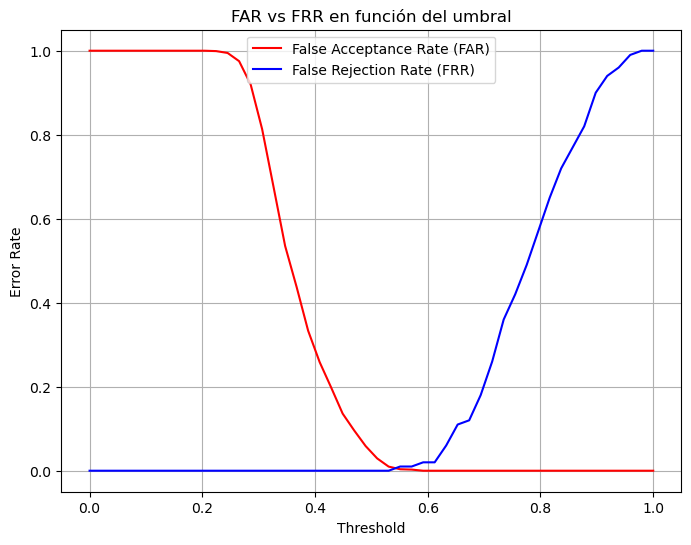

In [5]:
# Extraer los embeddings de la bbdd
embeddings_db = create_embeddings_db(ddbb_directory)

# Generar FAR, FRR y el gráfico
fars, frrs = calculate_far_frr_plot(embeddings_db)

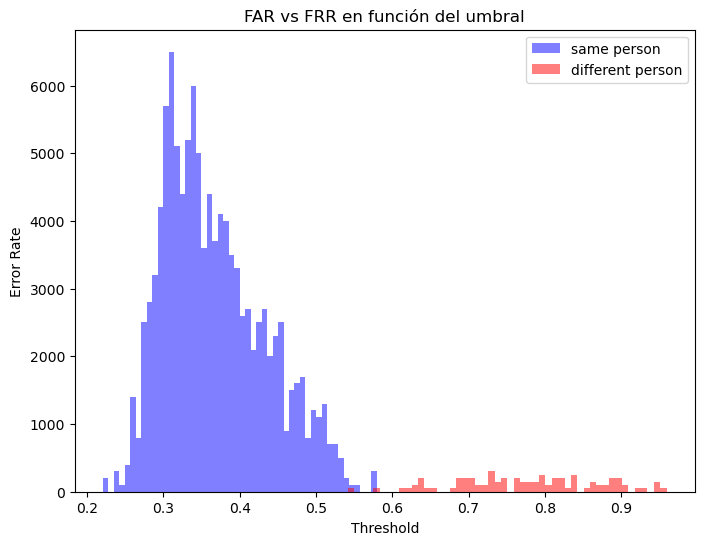

In [6]:
## pintar los histogramas, ver qeu va ha haber solapamiento, histograma de los porpios scores.la distancia que le ha dado a la msima persona, distancia que les ha dado a personas iguales, y difernetes,
#  pintar los histogramas de los scores de dsitancia dado la misma perosna
same_person, different_person = calcular_histograma(embeddings_db)

In [7]:
print(len(same_person))
print(len(different_person))

112500
5000


---

## TAREA 1.2:

 - Read the DiveFace database and obtain the embeddings of 50 face images (1 image per subject) from the 6 demographic groups (50*6=300 embeddings in total).
 - DiveFace contains face images from 3 demographic groups (3 ethnicity and 2 gender)

In [8]:
random.seed(42)
np.random.seed(42)  

bbdd_path = 'DiveFace4K_120\\4K_120'

def create_embeddings_6_groups(bbdd_path):
    """ Crea una base de datos de embeddings a partir de las imágenes en bbdd_path """
    embeddings_db = {}
    bbdd_path = Path(bbdd_path)  
    #print(bbdd_path)
    for group in os.listdir(bbdd_path):
        group_path = bbdd_path / group  
        
        if group_path.is_dir():
            embeddings_db[group] = []
            
            # Obtener todas las personas (subcarpetas) en el grupo
            persons = [person for person in os.listdir(group_path) if os.path.isdir(group_path / person)]
            
            # Seleccionar 50 personas aleatorias si hay más de 50

            selected_persons = random.sample(persons, 50) if len(persons) > 50 else persons
            # Recorrer las 50 personas seleccionadas
            for person in selected_persons:
                person_path = group_path / person

                # Obtener las imágenes de la persona
                img_files = [f for f in os.listdir(person_path) if f.endswith(('.jpg'))]
                
                # Seleccionar la primera imagen de la persona
                img_file = img_files[0]  # Elegir la primera imagen
                img_path = person_path / img_file

                print(f"Procesando: {img_path}")

                # Extraer el embedding de la imagen
                embedding = extract_faces(img_path)
                #print(embedding)
                if len(embedding) > 10:
                    embedding = np.asarray(embedding).squeeze()
                    embeddings_db[group].append(embedding)
    
    print("Base de datos de embeddings creada con éxito.")
    return embeddings_db

# Llamar a la función para crear la base de datos de embeddings
embeddings_6_groups_db = create_embeddings_6_groups(bbdd_path)

#imprimir la estructura del embedding
print(embeddings_6_groups_db.keys())

# Verificar la cantidad de embeddings por grupo
for group_name, embeddings in embeddings_6_groups_db.items():
    print(f"{group_name}: {len(embeddings)} embeddings")

# El total de embeddings esperados debe ser 50 por cada grupo

FileNotFoundError: [Errno 2] No such file or directory: 'DiveFace4K_120\\4K_120'

---

## TAREA 1.3:

 - Using t-SNE, represent the embeddings and its demographic group. Can you differentiate the different demographic groups?
 

In [ ]:
## sca cuantas dimesniones tiene cada embedding
print("Dimensiones de cada embedding:")
for group_name, embeddings in embeddings_6_groups_db.items():
    print(f"{group_name}: {embeddings[1].shape}")
    

In [ ]:
# Para este paso, extraemos todos los embeddings de todos los grupos
all_embeddings = []
labels = []  # Lista para almacenar las etiquetas de cada embedding (grupo demográfico)

# Extraemos los embeddings y las etiquetas
for group, embeddings in embeddings_6_groups_db.items():
    for emb in embeddings:
        all_embeddings.append(emb)
        labels.append(group)
        
# Convertimos todo a numpy arrays
all_embeddings = np.array(all_embeddings)
all_embeddings = all_embeddings.reshape(all_embeddings.shape[0], -1)

# Paso 1: Aplicar t-SNE para reducción de dimensionalidad (de 128 dimensiones a 2)
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(all_embeddings)

# Paso 2: Visualizar las embeddings con un gráfico de dispersión
plt.figure(figsize=(10, 8))

# Asignar un color para cada grupo demográfico
groups = list(embeddings_6_groups_db.keys())
colors = plt.cm.get_cmap('tab10', len(groups))

# Dibujar puntos en el gráfico, coloreados según el grupo demográfico
for i, group in enumerate(groups):
    group_indices = [idx for idx, label in enumerate(labels) if label == group]
    plt.scatter(embeddings_2d[group_indices, 0], embeddings_2d[group_indices, 1], 
                label=group, color=colors(i), alpha=0.6)

# Agregar etiquetas, título y leyenda
plt.title("t-SNE de los embeddings de caras por grupo demográfico", fontsize=15)
plt.xlabel("Componente 1", fontsize=12)
plt.ylabel("Componente 2", fontsize=12)
plt.legend(title="Grupos demográficos", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

---

## TAREA 1.4:
 * Using the ResNet-50 embedding (freeze the model), train your own attribute classifiers (ethnicity and gender). 
 *  Recommendation: use a simple dense layer with a softmax output. Divide DiveFace into train and test.

TODO: revisar la presentación porque ponía alguna cosa sobre este apartado

In [ ]:
X = all_embeddings

# Convertir etiquetas a números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)  # Convierte categorías en enteros

# Convertir a One-Hot Encoding
y = to_categorical(y, num_classes=6)  # Si hay 6 clases

print("X shape:", X.shape)
print("y shape:", y.shape)

In [ ]:

for layer in feature_extractor.layers:
    layer.trainable = False  # Congelar capas


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_classes = y.shape[1]  # Asegura que coincida con las categorías

classifier = Sequential([
    Input(shape=(X.shape[1],)),  # Tamaño de los embeddings
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Clasificación multiclase
])

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()
classifier.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = classifier.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


In [ ]:
input_size = 2048

def baseline_model():
    model = Sequential()
    model.add(Dense(60, input_dim=2048, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Compile model
X = np.array(X).astype(float)
y = np.asarray(y)
y = np_utils.to_categorical(y)
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))